### Day 0828 과제
- 데이터셋: 	auto-mpg.csv
- 목적: 		연비 예측
- 학습방법: 	지도학습/ 회귀
- 알고리즘:		LinearRegression

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### 데이터 전처리

In [178]:
# 데이터 로드
DATA_PATH = r'C:\Users\KDP-43\Desktop\머신러닝_1\data\auto_mpg.csv'
rawDF = pd.read_csv(DATA_PATH, usecols=['mpg','cylinders','displacement','horsepower','weight','acceleration', 'model year'])
rawDF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70


In [179]:
''' 
#mpg : 연비
#cylinders : 실린더수 
#displacement : 배기량
#horsepower: 출력
#weight : 차중
#acceleration : 가속능력
#model year : 출시년도
#origin : 제조국 1(USA), 2(EU), 3(JPN)
#name : 모델명
'''

' \n#mpg : 연비\n#cylinders : 실린더수 \n#displacement : 배기량\n#horsepower: 출력\n#weight : 차중\n#acceleration : 가속능력\n#model year : 출시년도\n#origin : 제조국 1(USA), 2(EU), 3(JPN)\n#name : 모델명\n'

In [180]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


horsepower ==> '?' fillna(method=''ffill') 처리 <br>
		==> 데이터 타입 (object -> int)

In [181]:
rawDF['horsepower'].replace('?',np.nan, inplace=True)
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [182]:
ffill_DF = rawDF.fillna(method='ffill')
ffill_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [183]:
# horsepower type: object -> int32
ffill_DF = ffill_DF.astype( {'horsepower':'int32'})
ffill_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


In [184]:
# mpg 단위 변환 (mile/gallon -> km/L)
ffill_DF['mpg'] = ffill_DF['mpg'] / (2.352)

##### 시각화

In [185]:
ffill_DF.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.777685,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842627,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897192,0.932824,-0.543684,-0.370164
horsepower,-0.777685,0.842627,0.897192,1.000000,0.864040,-0.686334,-0.417302
weight,-0.831741,0.896017,0.932824,0.864040,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686334,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.417302,-0.306564,0.288137,1.000000


In [186]:
mpg_corr = ffill_DF.corr()['mpg'][1:]
mpg_corr

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.777685
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

##### 피쳐 histogram

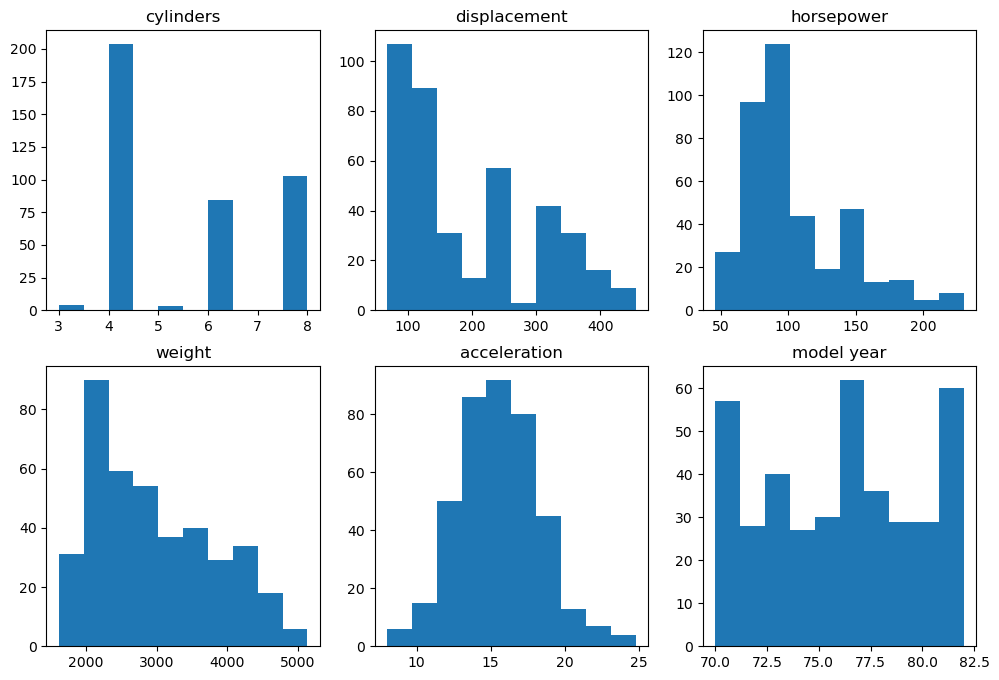

In [187]:
fig, ax = plt.subplots(2,3,figsize=(12,8))

for idx in range(6):
    
    ax[idx//3][idx%3].hist(ffill_DF[ffill_DF.columns[idx+1]])
    ax[idx//3][idx%3].set_title(f'{ffill_DF.columns[idx+1]}')

무슨 스케일러?!?!?!?

##### 연비-피쳐 scatter()

c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


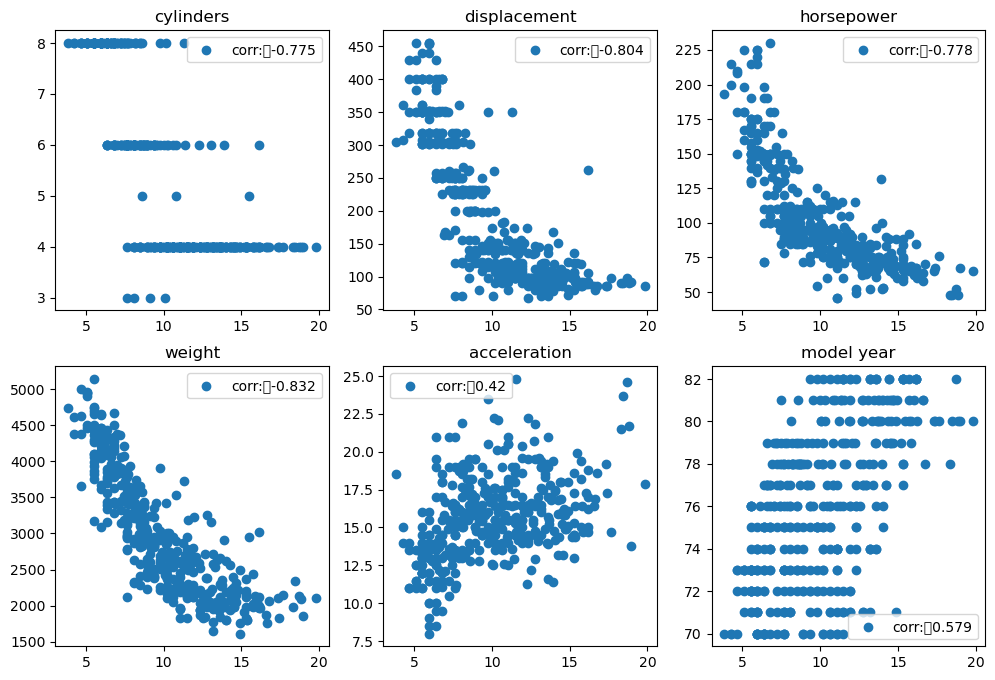

In [188]:


fig, ax = plt.subplots(2,3,figsize=(12,8))

for idx in range(6):
    
    ax[idx//3][idx%3].scatter(ffill_DF['mpg'], ffill_DF[ffill_DF.columns[idx+1]],
                              label=f'corr:	{round(mpg_corr[idx],3)}')
    ax[idx//3][idx%3].set_title(f'{ffill_DF.columns[idx+1]}')
    ax[idx//3][idx%3].legend()


#### 피쳐/타겟 생성 & 훈련/테스트 셋 생성

In [189]:
ffill_DF.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

In [190]:
# featureDF = ffill_DF[['cylinders', 'displacement', 'horsepower', 'weight']]
featureDF = ffill_DF[['cylinders', 'horsepower', 'weight', 'model year']]
targetSR = ffill_DF['mpg']

# 피쳐&타겟 차원
print(f'featureDF: {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}D')

featureDF: (398, 4), 2D
targetSR: (398,), 1D


In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    random_state=10
													)

# 학습/테스트 데이터 셋 차원
print(f'X_train: {X_train.shape}, {X_train.ndim}D', f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D', f'y_train: {y_test.shape}, {y_test.ndim}D')

X_train: (298, 4), 2D y_train: (298,), 1D
X_test: (100, 4), 2D y_train: (100,), 1D


#### 피쳐 스케일링
- minmaxscaler
- StandardScaler
- QuantileTransformer

In [193]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

In [194]:
# Scaler = MinMaxScaler()
# Scaler = StandardScaler()
Scaler = QuantileTransformer()
Scaler.fit(X_train)

c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (298). n_quantiles is set to n_samples.
  warnings.warn(


QuantileTransformer()

In [195]:
# 학습용/테스트용 데이터셋 전용 속성값 설정
X_train_scaled = Scaler.transform(X_train)			# X_train으로 생성한 Scaler 기준으로 
														# X_train 값 변환

X_test_scaled = Scaler.transform(X_test)				# X_train으로 생성한 Scaler 기준으로 
														# X_test 값 변환

#### 모델 생성 & 학습

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

# 학습진행
model.fit(X_train_scaled, y_train)

LinearRegression()

In [198]:
# 학습 후 모델 파라미터
print(f'기울기: {len(model.coef_)}개\n	{model.coef_}')			# 피쳐 2개 -> coef -> 2개!!
print(f'절편: {model.intercept_}')

기울기: 4개
	[ 0.59523215 -2.02686973 -7.57683284  3.95568381]
절편: 12.55549219679797


#### 모델 성능 평가
- model.score(test) & model.score(train) --> 두 수치가 유사해야 좋은 모델 (과적합,과소적합 판단 방법)

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [200]:
# model.score -> 내부에서 predict() 실행 ==> predict 결과로 R2 계수 산출 & 반환

score_test = model.score(X_test_scaled, y_test)
print(f'score_test: {score_test}')						# 선형 모델일 시, r2_score 와 같은 수치

score_train = model.score(X_train_scaled, y_train)
print(f'score_train: {score_train}')					

score : 0.8462535643515146


In [201]:

predict_mpg = model.predict(X_train_scaled)

# 손실/비용 계산 / 0에 가까울수록 Good
print(f'mse 	  : {mean_squared_error(y_train, predict_mpg)}')
print(f'rmse 	  : {mean_squared_error(y_train, predict_mpg, squared=False)}')
print(f'mae 	  : {mean_absolute_error(y_train, predict_mpg)}')

# 정답과 일치도	/ 1에 가까울수록 Good
print(f'r2 	  : {r2_score(y_train,predict_mpg)}')

mse 	  : 1.5941202255973355
rmse 	  : 1.26258473996692
mae 	  : 0.922339493021046
r2 	  : 0.8566439159002843
